In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as  plt
import seaborn as sns

import random
from random import sample

pd.set_option('display.max_columns', 1000)
from scipy.interpolate import interp1d
from scipy import interpolate as inter
import scipy.stats
from pandas.plotting import table 
import dataframe_image as dfi

from PIL import Image
pd.set_option('mode.chained_assignment',None)

In [2]:
metabolic = pd.read_csv('metabolic_corr.csv',index_col=0)
metabolic_p = pd.read_csv('metabolic_p.csv',index_col=0)


In [3]:
met_shape = metabolic.shape[0]
print(met_shape)

40


In [4]:
display(metabolic.head())
display(metabolic.tail())

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                               1.000000   
TAdipose - SubcutaneousM032G001                               0.026020   
TAdipose - SubcutaneousM038G001                               0.532636   
TAdipose - Visceral (Omentum)M010G001                        -0.011745   
TAdipose - Visceral (Omentum)M024G001                        -0.138855   

                                       TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                               0.026020   
TAdipose - SubcutaneousM032G001                               1.000000   
TAdipose - SubcutaneousM038G001                               0.210703   
TAdipose - Visceral (Omentum)M010G001                        -0.009905   
TAdipose - Visceral (Omentum)M024G001                        -0.014830   

                                       TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                               0.532636   
TAdipose - SubcutaneousM032G001                               0.210703   
TAdipose - SubcutaneousM038G001                               1.000000   
TAdipose - Visceral (Omentum)M010G001                        -0.324818   
TAdipose - Visceral (Omentum)M024G001                         0.011537   

                                       TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                                    -0.011745   
TAdipose - SubcutaneousM032G001                                    -0.009905   
TAdipose - SubcutaneousM038G001                                    -0.324818   
TAdipose - Visceral (Omentum)M010G001                               1.000000   
TAdipose - Visceral (Omentum)M024G001                              -0.031693   

                                       TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                                    -0.138855   
TAdipose - SubcutaneousM032G001                                    -0.014830   
TAdipose - SubcutaneousM038G001                                     0.011537   
TAdipose - Visceral (Omentum)M010G001                              -0.031693   
TAdipose - Visceral (Omentum)M024G001                               1.000000   

                                       TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                                     0.134702   
TAdipose - SubcutaneousM032G001                                    -0.039940   
TAdipose - SubcutaneousM038G001                                    -0.094004   
TAdipose - Visceral (Omentum)M010G001                               0.411618   
TAdipose - Visceral (Omentum)M024G001                               0.215150   

                                       TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                       0.125879   
TAdipose - SubcutaneousM032G001                       0.145727   
TAdipose - SubcutaneousM038G001                      -0.275146   
TAdipose - Visceral (Omentum)M010G001                 0.458490   
TAdipose - Visceral (Omentum)M024G001                -0.084069   

                                       TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                      -0.189432   
TAdipose - SubcutaneousM032G001                      -0.055024   
TAdipose - SubcutaneousM038G001                      -0.079593   
TAdipose - Visceral (Omentum)M010G001                -0.078901   
TAdipose - Visceral (Omentum)M024G001                 0.138485   

                                       TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                      -0.121794   
TAdipose - SubcutaneousM032G001                      -0.101602   
TAdipose - SubcutaneousM038G001                      -0.141973   
TAdipose - Visceral (Omentum)M010G001                -0.084736   
TAdipose - Visceral (Omentum)M024G001                 0.024362   

                                       TArtery - TibialM026G001  \
TAd

TAdipose - SubcutaneousM003G001  \
TTestisM002G001                              0.008517   
TThyroidM018G001                             0.017593   
TThyroidM032G001                            -0.005457   
TWhole BloodM002G001                        -0.069071   
TWhole BloodM007G001                        -0.112304   

                      TAdipose - SubcutaneousM032G001  \
TTestisM002G001                             -0.094100   
TThyroidM018G001                             0.021687   
TThyroidM032G001                            -0.107820   
TWhole BloodM002G001                        -0.033059   
TWhole BloodM007G001                         0.130825   

                      TAdipose - SubcutaneousM038G001  \
TTestisM002G001                              0.094962   
TThyroidM018G001                            -0.231765   
TThyroidM032G001                             0.017032   
TWhole BloodM002G001                        -0.017585   
TWhole BloodM007G001                         0.034238   

                      TAdipose - Visceral (Omentum)M010G001  \
TTestisM002G001                                   -0.150914   
TThyroidM018G001                                   0.267051   
TThyroidM032G001                                   0.168284   
TWhole BloodM002G001                              -0.234466   
TWhole BloodM007G001                              -0.062777   

                      TAdipose - Visceral (Omentum)M024G001  \
TTestisM002G001                                   -0.129553   
TThyroidM018G001                                   0.066359   
TThyroidM032G001                                   0.165905   
TWhole BloodM002G001                              -0.058857   
TWhole BloodM007G001                               0.007039   

                      TAdipose - Visceral (Omentum)M025G001  \
TTestisM002G001                                   -0.170419   
TThyroidM018G001                                   0.251337   
TThyroidM032G001                                   0.272737   
TWhole BloodM002G001                              -0.217780   
TWhole BloodM007G001                              -0.101391   

                      TArtery - AortaM020G001  TArtery - AortaM029G001  \
TTestisM002G001                     -0.120693                 0.151744   
TThyroidM018G001                     0.245640                -0.042085   
TThyroidM032G001                     0.005337                -0.064978   
TWhole BloodM002G001                -0.078293                 0.106190   
TWhole BloodM007G001                -0.191490                -0.093302   

                      TArtery - AortaM031G001  TArtery - TibialM026G001  \
TTestisM002G001                     -0.043459                  0.037677   
TThyroidM018G001                     0.112908                 -0.150268   
TThyroidM032G001                     0.085136                 -0.207944   
TWhole BloodM002G001                 0.022292                 -0.155074   
TWhole BloodM007G001                 0.203131                 -0.022236   

                      TArtery - TibialM029G001  TArtery - TibialM035G001  \
TTestisM002G001                       0.035795                  0.102093   
TThyroidM018G001                      0.339950                  0.155750   
TThyroidM032G001                      0.142135                  0.080693   
TWhole BloodM002G001                 -0.199350                 -0.127404   
TWhole BloodM007G001                 -0.073533                 -0.082806   

                      TBreast - Mammary TissueM016G001  \
TTestisM002G001                               0.322654   
TThyroidM018G001                              0.048877   
TThyroidM032G001                              0.064226   
TWhole BloodM002G001                          0.028272   
TWhole BloodM007G001                         -0.053255   

                      TBreast - Mammary TissueM017G001  \
TTestisM002G001                               0.204458   
TThyroidM018G001                      

In [5]:
display(metabolic_p.head(3))
display(metabolic_p.tail(3))

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                     1.000000e+00   
TAdipose - SubcutaneousM032G001                     7.187480e-01   
TAdipose - SubcutaneousM038G001                     1.308679e-15   

                                 TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                         0.718748   
TAdipose - SubcutaneousM032G001                         1.000000   
TAdipose - SubcutaneousM038G001                         0.003188   

                                 TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                     1.308679e-15   
TAdipose - SubcutaneousM032G001                     3.188422e-03   
TAdipose - SubcutaneousM038G001                     1.000000e+00   

                                 TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                               0.897834   
TAdipose - SubcutaneousM032G001                               0.913772   
TAdipose - SubcutaneousM038G001                               0.000262   

                                 TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                               0.127180   
TAdipose - SubcutaneousM032G001                               0.871211   
TAdipose - SubcutaneousM038G001                               0.899637   

                                 TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                               0.139070   
TAdipose - SubcutaneousM032G001                               0.662270   
TAdipose - SubcutaneousM038G001                               0.303058   

                                 TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                 0.265875   
TAdipose - SubcutaneousM032G001                 0.197118   
TAdipose - SubcutaneousM038G001                 0.013507   

                                 TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                 0.092387   
TAdipose - SubcutaneousM032G001                 0.627840   
TAdipose - SubcutaneousM038G001                 0.482795   

                                 TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                 0.281828   
TAdipose - SubcutaneousM032G001                 0.369836   
TAdipose - SubcutaneousM038G001                 0.209030   

                                 TArtery - TibialM026G001  \
TAdipose - SubcutaneousM003G001              1.722750e-01   
TAdipose - SubcutaneousM032G001              2.042857e-03   
TAdipose - SubcutaneousM038G001              7.794057e-07   

                                 TArtery - TibialM029G001  \
TAdipose - SubcutaneousM003G001              7.472065e-01   
TAdipose - SubcutaneousM032G001              1.534104e-07   
TAdipose - SubcutaneousM038G001              2.514976e-07   

                                 TArtery - TibialM035G001  \
TAdipose - SubcutaneousM003G001                  0.024677   
TAdipose - SubcutaneousM032G001                  0.004489   
TAdipose - SubcutaneousM038G001                  0.542353   

                                 TBreast - Mammary TissueM016G001  \
TAdipose - SubcutaneousM003G001                          0.117292   
TAdipose - SubcutaneousM032G001                          0.836725   
TAdipose - SubcutaneousM038G001                          0.951757   

                                 TBreast - Mammary TissueM017G001  \
TAdipose - SubcutaneousM003G001                          0.027163   
TAdipose - SubcutaneousM032G001                          0.501189   
TAdipose - SubcutaneousM038G001                          0.413960   

                                 TCells - Cultured fibroblastsM002G001  \
TAdipose - SubcutaneousM003G001                               0.783771   
TAdipose - SubcutaneousM032G001                               0.180331   
TAdipose - SubcutaneousM038G001                               0.802734   

              

TAdipose - SubcutaneousM003G001  \
TThyroidM032G001                             0.947699   
TWhole BloodM002G001                         0.388499   
TWhole BloodM007G001                         0.160056   

                      TAdipose - SubcutaneousM032G001  \
TThyroidM032G001                             0.193642   
TWhole BloodM002G001                         0.680081   
TWhole BloodM007G001                         0.101331   

                      TAdipose - SubcutaneousM038G001  \
TThyroidM032G001                             0.837764   
TWhole BloodM002G001                         0.826413   
TWhole BloodM007G001                         0.669326   

                      TAdipose - Visceral (Omentum)M010G001  \
TThyroidM032G001                                   0.066166   
TWhole BloodM002G001                               0.007972   
TWhole BloodM007G001                               0.483204   

                      TAdipose - Visceral (Omentum)M024G001  \
TThyroidM032G001                                   0.070149   
TWhole BloodM002G001                               0.510988   
TWhole BloodM007G001                               0.937392   

                      TAdipose - Visceral (Omentum)M025G001  \
TThyroidM032G001                                    0.00258   
TWhole BloodM002G001                                0.01391   
TWhole BloodM007G001                                0.25669   

                      TArtery - AortaM020G001  TArtery - AortaM029G001  \
TThyroidM032G001                     0.960414                 0.545197   
TWhole BloodM002G001                 0.468411                 0.324776   
TWhole BloodM007G001                 0.073900                 0.387245   

                      TArtery - AortaM031G001  TArtery - TibialM026G001  \
TThyroidM032G001                     0.427628                  0.013019   
TWhole BloodM002G001                 0.836670                  0.052466   
TWhole BloodM007G001                 0.057678                  0.782222   

                      TArtery - TibialM029G001  TArtery - TibialM035G001  \
TThyroidM032G001                      0.091538                  0.339767   
TWhole BloodM002G001                  0.012312                  0.111814   
TWhole BloodM007G001                  0.360064                  0.302522   

                      TBreast - Mammary TissueM016G001  \
TThyroidM032G001                              0.536343   
TWhole BloodM002G001                          0.775729   
TWhole BloodM007G001                          0.591324   

                      TBreast - Mammary TissueM017G001  \
TThyroidM032G001                              0.148038   
TWhole BloodM002G001                          0.986057   
TWhole BloodM007G001                          0.283160   

                      TCells - Cultured fibroblastsM002G001  \
TThyroidM032G001                                   0.297832   
TWhole BloodM002G001                               0.676523   
TWhole BloodM007G001                               0.818655   

                      TEsophagus - MucosaM022G001  \
TThyroidM032G001                         0.024614   
TWhole BloodM002G001                     0.924790   
TWhole BloodM007G001                     0.211932   

                      TEsophagus - MuscularisM019G001  \
TThyroidM032G001                             0.049675   
TWhole BloodM002G001                         0.674501   
TWhole BloodM007G001                         0.266480   

                      TEsophagus - MuscularisM035G001  \
TThyroidM032G001                             0.054613   
TWhole BloodM002G001                         0.243044   
TWhole BloodM007G001                         0.899848   

                      THeart - Atrial AppendageM003G001  \
TThyroidM032G001                               0.731960   
TWhole BloodM002G001                           0.079121   
TWhole BloodM007G001                           0.283911   

                      THeart - Atrial Appendag

In [6]:
corr_thresholds = list(range(15, 251, 5))
myInt = 5000
corr_thresholds[:] = [x / myInt for x in corr_thresholds]
print(corr_thresholds)
print(len(corr_thresholds))

pos_cases = [0]*48
neg_cases = [0]*48
random_cases = [0]*48





[0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]
48


In [7]:
#corrlist = []

met_corrlist = []
met_plist = []

metabolic_indexes = metabolic.index.tolist()
metabolic_columns = metabolic.columns.tolist()

for i in range(metabolic.shape[0]):
    for j in range(i+1,metabolic.shape[1]):
        meti = metabolic_indexes[i]
        metj = metabolic_columns[j]
        meti = meti[1:-8]
        metj = metj[1:-8]
        #if meti !=metj:
        met_corrlist.append(metabolic.iloc[i,j])
        met_plist.append(metabolic_p.iloc[i,j])
        
inter_met_corr = len(met_corrlist)
print(inter_met_corr)



780


In [8]:
d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,
     'random expectation' : random_cases
     }
     
df_p = pd.DataFrame(d)

display(df_p)

                   
        

corr thresholds  pos cases  neg cases  random expectation
0             0.003          0          0                   0
1             0.004          0          0                   0
2             0.005          0          0                   0
3             0.006          0          0                   0
4             0.007          0          0                   0
5             0.008          0          0                   0
6             0.009          0          0                   0
7             0.010          0          0                   0
8             0.011          0          0                   0
9             0.012          0          0                   0
10            0.013          0          0                   0
11            0.014          0          0                   0
12            0.015          0          0                   0
13            0.016          0          0                   0
14            0.017          0          0                   0
15            0.018          0          0                   0
16            0.019          0          0                   0
17            0.020          0          0                   0
18            0.021          0          0                   0
19            0.022          0          0                   0
20            0.023          0          0                   0
21            0.024          0          0                   0
22            0.025          0          0                   0
23            0.026          0          0                   0
24            0.027          0          0                   0
25            0.028          0          0                   0
26            0.029          0          0                   0
27            0.030          0          0                   0
28            0.031          0          0                   0
29            0.032          0          0                   0
30            0.033          0          0                   0
31            0.034          0          0                   0
32            0.035          0          0                   0
33            0.036          0          0                   0
34            0.037          0          0                   0
35            0.038          0          0                   0
36            0.039          0          0                   0
37            0.040          0          0                   0
38            0.041          0          0                   0
39            0.042          0          0                   0
40            0.043          0          0                   0
41            0.044          0          0                   0
42            0.045          0          0                   0
43            0.046          0          0                   0
44            0.047          0          0                   0
45            0.048          0          0                   0
46            0.049          0          0                   0
47            0.050          0          0                   0

In [9]:
display(metabolic_p.head(3))

TAdipose - SubcutaneousM003G001  \
TAdipose - SubcutaneousM003G001                     1.000000e+00   
TAdipose - SubcutaneousM032G001                     7.187480e-01   
TAdipose - SubcutaneousM038G001                     1.308679e-15   

                                 TAdipose - SubcutaneousM032G001  \
TAdipose - SubcutaneousM003G001                         0.718748   
TAdipose - SubcutaneousM032G001                         1.000000   
TAdipose - SubcutaneousM038G001                         0.003188   

                                 TAdipose - SubcutaneousM038G001  \
TAdipose - SubcutaneousM003G001                     1.308679e-15   
TAdipose - SubcutaneousM032G001                     3.188422e-03   
TAdipose - SubcutaneousM038G001                     1.000000e+00   

                                 TAdipose - Visceral (Omentum)M010G001  \
TAdipose - SubcutaneousM003G001                               0.897834   
TAdipose - SubcutaneousM032G001                               0.913772   
TAdipose - SubcutaneousM038G001                               0.000262   

                                 TAdipose - Visceral (Omentum)M024G001  \
TAdipose - SubcutaneousM003G001                               0.127180   
TAdipose - SubcutaneousM032G001                               0.871211   
TAdipose - SubcutaneousM038G001                               0.899637   

                                 TAdipose - Visceral (Omentum)M025G001  \
TAdipose - SubcutaneousM003G001                               0.139070   
TAdipose - SubcutaneousM032G001                               0.662270   
TAdipose - SubcutaneousM038G001                               0.303058   

                                 TArtery - AortaM020G001  \
TAdipose - SubcutaneousM003G001                 0.265875   
TAdipose - SubcutaneousM032G001                 0.197118   
TAdipose - SubcutaneousM038G001                 0.013507   

                                 TArtery - AortaM029G001  \
TAdipose - SubcutaneousM003G001                 0.092387   
TAdipose - SubcutaneousM032G001                 0.627840   
TAdipose - SubcutaneousM038G001                 0.482795   

                                 TArtery - AortaM031G001  \
TAdipose - SubcutaneousM003G001                 0.281828   
TAdipose - SubcutaneousM032G001                 0.369836   
TAdipose - SubcutaneousM038G001                 0.209030   

                                 TArtery - TibialM026G001  \
TAdipose - SubcutaneousM003G001              1.722750e-01   
TAdipose - SubcutaneousM032G001              2.042857e-03   
TAdipose - SubcutaneousM038G001              7.794057e-07   

                                 TArtery - TibialM029G001  \
TAdipose - SubcutaneousM003G001              7.472065e-01   
TAdipose - SubcutaneousM032G001              1.534104e-07   
TAdipose - SubcutaneousM038G001              2.514976e-07   

                                 TArtery - TibialM035G001  \
TAdipose - SubcutaneousM003G001                  0.024677   
TAdipose - SubcutaneousM032G001                  0.004489   
TAdipose - SubcutaneousM038G001                  0.542353   

                                 TBreast - Mammary TissueM016G001  \
TAdipose - SubcutaneousM003G001                          0.117292   
TAdipose - SubcutaneousM032G001                          0.836725   
TAdipose - SubcutaneousM038G001                          0.951757   

                                 TBreast - Mammary TissueM017G001  \
TAdipose - SubcutaneousM003G001                          0.027163   
TAdipose - SubcutaneousM032G001                          0.501189   
TAdipose - SubcutaneousM038G001                          0.413960   

                                 TCells - Cultured fibroblastsM002G001  \
TAdipose - SubcutaneousM003G001                               0.783771   
TAdipose - SubcutaneousM032G001                               0.180331   
TAdipose - SubcutaneousM038G001                               0.802734   

              

In [10]:
for i in range(df_p.shape[0]):
    count_pos = 0
    count_neg = 0
    for j in range(len(met_corrlist)):
        if met_corrlist[j] >= 0:
            if met_plist[j] < df_p['corr thresholds'].iloc[i]:
                count_pos +=1
    for j in range(len(met_corrlist)):
        if met_corrlist[j] <= 0:
            if met_plist[j] < df_p['corr thresholds'].iloc[i]:
                count_neg +=1
            
    df_p['pos cases'].iloc[i] = count_pos
    df_p['neg cases'].iloc[i] = count_neg
    #df_p['ratio pos neg'].iloc[i] = count_pos / max(count_neg,1)
df_p['ratio']  = df_p['pos cases'] / df_p['neg cases']
df_p['random expectation'] = inter_met_corr * df_p['corr thresholds']

display(df_p.head(26))

corr thresholds  pos cases  neg cases  random expectation     ratio
0             0.003         36         14                2.34  2.571429
1             0.004         40         16                3.12  2.500000
2             0.005         42         19                3.90  2.210526
3             0.006         45         19                4.68  2.368421
4             0.007         47         19                5.46  2.473684
5             0.008         49         20                6.24  2.450000
6             0.009         51         20                7.02  2.550000
7             0.010         51         23                7.80  2.217391
8             0.011         55         23                8.58  2.391304
9             0.012         55         23                9.36  2.391304
10            0.013         56         25               10.14  2.240000
11            0.014         56         28               10.92  2.000000
12            0.015         57         29               11.70  1.965517
13            0.016         57         31               12.48  1.838710
14            0.017         57         32               13.26  1.781250
15            0.018         59         33               14.04  1.787879
16            0.019         62         34               14.82  1.823529
17            0.020         62         34               15.60  1.823529
18            0.021         63         35               16.38  1.800000
19            0.022         63         35               17.16  1.800000
20            0.023         65         37               17.94  1.756757
21            0.024         67         40               18.72  1.675000
22            0.025         69         41               19.50  1.682927
23            0.026         69         41               20.28  1.682927
24            0.027         70         41               21.06  1.707317
25            0.028         71         42               21.84  1.690476

In [11]:

display(df_p.tail(26))

corr thresholds  pos cases  neg cases  random expectation     ratio
22            0.025         69         41               19.50  1.682927
23            0.026         69         41               20.28  1.682927
24            0.027         70         41               21.06  1.707317
25            0.028         71         42               21.84  1.690476
26            0.029         71         44               22.62  1.613636
27            0.030         71         44               23.40  1.613636
28            0.031         72         44               24.18  1.636364
29            0.032         76         44               24.96  1.727273
30            0.033         76         45               25.74  1.688889
31            0.034         76         45               26.52  1.688889
32            0.035         77         45               27.30  1.711111
33            0.036         77         45               28.08  1.711111
34            0.037         77         45               28.86  1.711111
35            0.038         78         47               29.64  1.659574
36            0.039         80         47               30.42  1.702128
37            0.040         80         48               31.20  1.666667
38            0.041         80         48               31.98  1.666667
39            0.042         80         48               32.76  1.666667
40            0.043         80         48               33.54  1.666667
41            0.044         82         48               34.32  1.708333
42            0.045         82         48               35.10  1.708333
43            0.046         82         49               35.88  1.673469
44            0.047         83         53               36.66  1.566038
45            0.048         84         53               37.44  1.584906
46            0.049         84         53               38.22  1.584906
47            0.050         86         54               39.00  1.592593

In [12]:
tissue_key = pd.read_csv('IncludedTissuesSelect.csv',index_col=0)
display(tissue_key.head(19))

tissue_key_index_list = tissue_key.index.tolist()
data_frames = []
for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    print(current)

Quantity
Tissue Type                                  
Adipose - Subcutaneous                      3
Adipose - Visceral (Omentum)                3
Artery - Aorta                              3
Artery - Tibial                             3
Breast - Mammary Tissue                     2
Cells - Cultured fibroblasts                1
Esophagus - Mucosa                          1
Esophagus - Muscularis                      2
Heart - Atrial Appendage                    2
Heart - Left Ventricle                      1
Liver                                       3
Lung                                        4
Muscle - Skeletal                           1
Nerve - Tibial                              2
Skin - Not Sun Exposed (Suprapubic)         2
Skin - Sun Exposed (Lower leg)              2
Testis                                      1
Thyroid                                     2
Whole Blood                                 2

TAdipose - Subcutaneous_df.csv
TAdipose - Visceral (Omentum)_df.csv
TArtery - Aorta_df.csv
TArtery - Tibial_df.csv
TBreast - Mammary Tissue_df.csv
TCells - Cultured fibroblasts_df.csv
TEsophagus - Mucosa_df.csv
TEsophagus - Muscularis_df.csv
THeart - Atrial Appendage_df.csv
THeart - Left Ventricle_df.csv
TLiver_df.csv
TLung_df.csv
TMuscle - Skeletal_df.csv
TNerve - Tibial_df.csv
TSkin - Not Sun Exposed (Suprapubic)_df.csv
TSkin - Sun Exposed (Lower leg)_df.csv
TTestis_df.csv
TThyroid_df.csv
TWhole Blood_df.csv


In [13]:
tissue_key_index_list = tissue_key.index.tolist()
data_frames = []


for i in range(len(tissue_key_index_list)):
    current = 'T'+tissue_key_index_list[i]+'_df.csv'
    data_frames.append(current)

tissue_key['DataFrames'] = data_frames
display(tissue_key.head())

Quantity                            DataFrames
Tissue Type                                                                 
Adipose - Subcutaneous               3        TAdipose - Subcutaneous_df.csv
Adipose - Visceral (Omentum)         3  TAdipose - Visceral (Omentum)_df.csv
Artery - Aorta                       3                TArtery - Aorta_df.csv
Artery - Tibial                      3               TArtery - Tibial_df.csv
Breast - Mammary Tissue              2       TBreast - Mammary Tissue_df.csv

In [14]:
def select_subset(seedbasis):
    modules = []
    for i in range(tissue_key.shape[0]):
        current_seed = seedbasis+i
        sample_size = tissue_key['Quantity'].iloc[i]
        current_df = tissue_key['DataFrames'].iloc[i]
        df = pd.read_csv(current_df,index_col=0)
        df = df.sample(random_state=current_seed, n=sample_size, axis=1)
        df_columns = df.columns.tolist()
        for j in range(len(df_columns)):
            modules.append(df_columns[j])
        #print(modules)
        #print(len(modules))
    return(modules)

a = select_subset(2000)
print(a)

['TAdipose - SubcutaneousM006G002', 'TAdipose - SubcutaneousM018G006', 'TAdipose - SubcutaneousM012G099', 'TAdipose - Visceral (Omentum)M022G005', 'TAdipose - Visceral (Omentum)M009G006', 'TAdipose - Visceral (Omentum)M023G005', 'TArtery - AortaM022G099', 'TArtery - AortaM036G099', 'TArtery - AortaM049G099', 'TArtery - TibialM023G002', 'TArtery - TibialM028G099', 'TArtery - TibialM020G099', 'TBreast - Mammary TissueM001G002', 'TBreast - Mammary TissueM014G005', 'TCells - Cultured fibroblastsM003G006', 'TEsophagus - MucosaM021G006', 'TEsophagus - MuscularisM027G005', 'TEsophagus - MuscularisM008G002', 'THeart - Atrial AppendageM016G003', 'THeart - Atrial AppendageM021G003', 'THeart - Left VentricleM015G002', 'TLiverM034G099', 'TLiverM037G006', 'TLiverM006G006', 'TLungM003G004', 'TLungM020G006', 'TLungM017G006', 'TLungM002G099', 'TMuscle - SkeletalM014G006', 'TNerve - TibialM049G099', 'TNerve - TibialM046G099', 'TSkin - Not Sun Exposed (Suprapubic)M010G006', 'TSkin - Not Sun Exposed (Sup

In [15]:
all_corrs = pd.read_csv('big_corr.csv',index_col=0)
print(all_corrs.shape)


(609, 609)


In [16]:
all_ps = pd.read_csv('big_p.csv',index_col=0)
print(all_ps.shape)

(609, 609)


In [17]:
all_corrs_values = []
all_p_values = []

big_indexes = all_corrs.index.tolist()
big_columns = all_corrs.columns.tolist()



for i in range(all_corrs.shape[0]):
    for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        #if alli !=allj:
        all_corrs_values.append(all_corrs.iloc[i,j])
        all_p_values.append(all_ps.iloc[i,j])
            
        
            
        
            
print(len(all_corrs_values))


185136


In [18]:
def make_smaller_df(df_cor,df_pvalue,random_state_seed):
    
    sub_corrs = select_subset(random_state_seed)
    #print(sub_corrs)
    
    df1_cor = df_cor.copy(deep=True)
    df1_p = df_pvalue.copy(deep=True)
    df1_cor =  df1_cor[sub_corrs]
    df1_cor = df1_cor.loc[sub_corrs]
    df1_p =  df1_p[sub_corrs]
    df1_p = df1_p.loc[sub_corrs]
    
    
    
    
    
    

    return df1_cor, df1_p

df1_c, df2_p = make_smaller_df(all_corrs,all_ps,1000)
print(df1_c.shape)
print(df2_p.shape)





    


(40, 40)
(40, 40)


In [19]:
def one_iteration_subsample(df,df_p,random_state_seed):
    
    
    df2, df2_p = make_smaller_df(df,df_p,random_state_seed)
    

    df2_index = df2.index.tolist()
    df2_columns = df2.columns.tolist()
    
    corr2list = []
    corr2p = []
    
    '''
    for i in range(all_corrs.shape[0]):
        for j in range(i+1,all_corrs.shape[1]):
        alli = big_indexes[i]
        allj = big_columns[j]
        
        
        
        
        alli = alli[1:-8]
        allj = allj[1:-8]
        if alli !=allj:
            all_corrs_values.append(all_corrs.iloc[i,j])
            all_p_values.append(all_ps.iloc[i,j])
    '''
    
    
    for i in range(df2.shape[0]):
        for j in range(i+1,df2.shape[1]):
            alli = df2_index[i]
            allj = df2_columns[j]
            alli = alli[1:-8]
            allj = allj[1:-8]
                
            #if alli !=allj:
            
            corr2list.append(df2.iloc[i,j])
            corr2p.append(df2_p.iloc[i,j])
    
            
            
    corr_thresholds = list(range(15, 251, 5))
    myInt = 5000
    corr_thresholds[:] = [x / myInt for x in corr_thresholds]
    #print(corr_thresholds)
    #print(len(corr_thresholds))


    pos_cases = [0]*48
    neg_cases = [0]*48
    ratios = [0]*48
    
    
    d = {'corr thresholds' : corr_thresholds, 
     'pos cases' : pos_cases,
     'neg cases' : neg_cases,    
     'ratios'    : ratios
         
     }
     
    df_p = pd.DataFrame(d)
   


    for i in range(df_p.shape[0]):
        count_pos = 0
        count_neg = 0
        for j in range(len(corr2list)):
            if corr2list[j] >= 0:
                if corr2p[j] < df_p['corr thresholds'].iloc[i]:
                    count_pos +=1
                
            #if corr2list[j] >= df_metabolic['corr thresholds'].iloc[i]:
            #    count_pos +=1
        for j in range(len(corr2list)):
            if corr2list[j] <= 0:
                if corr2p[j] < df_p['corr thresholds'].iloc[i]:
                    count_neg +=1
            
        df_p['pos cases'].iloc[i] = count_pos
        df_p['neg cases'].iloc[i] = count_neg
        #df_corr_stats['ratio pos neg'].iloc[i] = count_pos / max(1,count_neg)
    df_p['ratios'] = df_p['pos cases'] / df_p['neg cases']
    #print('iteration')
    #print(df_p.shape)
    #print(len(corr2list))
    return df_p






In [20]:
corr_big_list = []
pos_big_list = []
neg_big_list = []
ratio_big_list = []



for k in range(1000):
    if (k % 100 == 0):
        print (k)
    k_times1000 = k*1000
    df_stats = one_iteration_subsample(all_corrs,all_ps,k_times1000 )
    threshold = df_stats['corr thresholds'].tolist()
    positives = df_stats['pos cases'].tolist()
    negatives = df_stats['neg cases'].tolist()
    ratios = df_stats['ratios'].tolist()
    corr_big_list = corr_big_list+threshold
    pos_big_list = pos_big_list+positives
    neg_big_list = neg_big_list+negatives
    ratio_big_list = ratio_big_list + ratios

#print(len(corr_big_list))
    
    
   

0
100
200
300
400
500
600
700
800
900


In [21]:
display(df_stats.max())

corr thresholds     0.050000
pos cases          76.000000
neg cases          75.000000
ratios              1.027027
dtype: float64

In [22]:
display(df_stats.min())

corr thresholds     0.003000
pos cases          23.000000
neg cases          35.000000
ratios              0.657143
dtype: float64

In [23]:
print(df_stats.shape)

(48, 4)


In [24]:
d = {'corr thresholds' : corr_big_list, 
     'pos cases' : pos_big_list,
     'neg cases' : neg_big_list,
     'ratios' : ratio_big_list
     }
     
df_corr_stats = pd.DataFrame(d)
print(df_corr_stats.shape)
display(df_corr_stats.head(3))
display(df_corr_stats.tail(4))



(48000, 4)


corr thresholds  pos cases  neg cases    ratios
0            0.003         41         38  1.078947
1            0.004         43         39  1.102564
2            0.005         44         41  1.073171

corr thresholds  pos cases  neg cases    ratios
47996            0.047         76         74  1.027027
47997            0.048         76         74  1.027027
47998            0.049         76         74  1.027027
47999            0.050         76         75  1.013333

In [25]:
display(df_corr_stats.max())

corr thresholds      0.050000
pos cases          126.000000
neg cases          117.000000
ratios               7.333333
dtype: float64

In [26]:
display(df_corr_stats.min())

corr thresholds    0.00300
pos cases          6.00000
neg cases          3.00000
ratios             0.26087
dtype: float64

In [27]:
print(df_corr_stats.shape)

(48000, 4)


In [28]:
df_corr_stats.replace([np.inf, -np.inf], 1, inplace=True)

In [29]:
quantile95 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
quantile99 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.99)

In [30]:
display(quantile95.sample(34))

pos cases  neg cases    ratios
corr thresholds                                
0.045                89.00      89.05  1.347052
0.017                63.00      65.00  1.428734
0.050                92.00      93.00  1.333333
0.031                78.00      78.05  1.393214
0.012                56.00      58.00  1.454791
0.047                90.00      90.05  1.343284
0.028                75.00      76.00  1.394737
0.033                80.00      81.00  1.375000
0.020                66.00      68.00  1.432477
0.044                89.00      88.00  1.357210
0.021                67.05      69.00  1.414634
0.046                90.00      90.00  1.340273
0.010                54.00      55.00  1.483621
0.041                87.00      86.00  1.369635
0.030                77.00      78.00  1.393979
0.029                76.00      76.05  1.400000
0.035                82.00      82.00  1.387755
0.008                51.00      51.00  1.520087
0.032                79.00      80.00  1.400000
0.043                88.00      87.00  1.365449
0.019                66.00      67.00  1.428734
0.015                60.00      62.05  1.450000
0.006                48.00      47.00  1.619048
0.024                71.00      72.00  1.394010
0.039                85.05      85.00  1.377854
0.027                74.00      75.00  1.381223
0.025                72.00      73.00  1.400000
0.023                69.00      71.00  1.404794
0.016                62.00      63.05  1.437625
0.007                49.05      49.00  1.562946
0.042                88.00      87.00  1.361886
0.022                68.00      70.00  1.413043
0.005                45.00      45.00  1.636688
0.049                92.00      92.05  1.333578

In [31]:
display(quantile99.sample(34))

pos cases  neg cases    ratios
corr thresholds                                
0.049               108.00     104.00  1.678604
0.007                62.00      58.01  2.066714
0.020                79.02      80.00  1.795500
0.009                65.00      63.01  1.943429
0.026                88.00      84.03  1.800298
0.030                91.00      90.00  1.762536
0.029                90.01      88.01  1.806218
0.024                86.00      84.00  1.818205
0.015                73.01      75.00  1.875096
0.023                82.03      83.00  1.744033
0.047               106.00     103.00  1.667021
0.027                88.00      87.00  1.825083
0.040               100.01      97.01  1.739181
0.022                82.00      81.01  1.795455
0.019                79.00      79.00  1.772086
0.031                92.01      91.00  1.786357
0.013                71.01      71.00  1.966279
0.044               104.00     100.01  1.730962
0.034                94.01      94.00  1.769396
0.017                75.01      76.01  1.764885
0.004                54.00      50.01  2.445000
0.033                93.00      94.00  1.764916
0.010                67.01      66.00  1.960400
0.025                87.01      84.02  1.794638
0.039                99.01      97.01  1.729081
0.037                98.01      96.01  1.760325
0.003                48.01      47.01  2.376250
0.035                96.00      95.01  1.769538
0.041               101.01      97.03  1.730919
0.050               108.01     105.00  1.673631
0.043               102.01     100.01  1.730919
0.032                93.00      92.01  1.786224
0.046               105.00     103.00  1.703867
0.042               101.01      99.01  1.730919

In [32]:
quantile05 = df_corr_stats.groupby(by=['corr thresholds']).quantile(0.05)

In [33]:
display(quantile05.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.003                13.00      13.00  0.624784
0.004                15.00      14.00  0.633095
0.005                16.00      15.00  0.655106
0.006                17.00      17.00  0.666667
0.007                18.00      18.00  0.658504
0.008                19.00      19.00  0.666228
0.009                20.00      20.00  0.666228
0.010                21.00      21.00  0.659955
0.011                22.00      22.00  0.666667
0.012                23.00      23.00  0.674923
0.013                24.00      24.00  0.686246
0.014                25.00      24.00  0.692216
0.015                26.00      26.00  0.690808
0.016                26.00      26.00  0.693878
0.017                27.00      27.00  0.692308
0.018                28.00      28.00  0.705845
0.019                29.00      29.00  0.708283
0.020                30.00      29.95  0.714127
0.021                31.00      30.00  0.716981
0.022                31.00      31.00  0.725791
0.023                32.00      32.00  0.725386
0.024                33.00      32.00  0.730769
0.025                33.95      33.00  0.733286
0.026                34.00      33.95  0.735264
0.027                35.00      34.00  0.730689
0.028                35.00      35.00  0.742556
0.029                36.00      35.00  0.739097
0.030                36.00      36.00  0.734626
0.031                37.00      36.00  0.736792
0.032                38.00      37.00  0.740170
0.033                38.00      38.00  0.747163
0.034                39.00      38.95  0.750000
0.035                40.00      39.00  0.755514
0.036                41.00      39.95  0.754359

In [34]:
display(quantile95.head(34))

pos cases  neg cases    ratios
corr thresholds                                
0.003                40.00      39.00  1.684211
0.004                43.00      42.00  1.688125
0.005                45.00      45.00  1.636688
0.006                48.00      47.00  1.619048
0.007                49.05      49.00  1.562946
0.008                51.00      51.00  1.520087
0.009                52.00      53.00  1.500758
0.010                54.00      55.00  1.483621
0.011                55.00      56.00  1.454675
0.012                56.00      58.00  1.454791
0.013                58.00      59.00  1.454735
0.014                59.00      60.05  1.464405
0.015                60.00      62.05  1.450000
0.016                62.00      63.05  1.437625
0.017                63.00      65.00  1.428734
0.018                64.00      66.00  1.419637
0.019                66.00      67.00  1.428734
0.020                66.00      68.00  1.432477
0.021                67.05      69.00  1.414634
0.022                68.00      70.00  1.413043
0.023                69.00      71.00  1.404794
0.024                71.00      72.00  1.394010
0.025                72.00      73.00  1.400000
0.026                73.00      74.00  1.387812
0.027                74.00      75.00  1.381223
0.028                75.00      76.00  1.394737
0.029                76.00      76.05  1.400000
0.030                77.00      78.00  1.393979
0.031                78.00      78.05  1.393214
0.032                79.00      80.00  1.400000
0.033                80.00      81.00  1.375000
0.034                81.00      82.00  1.382747
0.035                82.00      82.00  1.387755
0.036                83.00      83.05  1.383554

In [35]:
df_all_corr_averages = df_corr_stats.groupby('corr thresholds').mean()

df_all_corr_std = df_corr_stats.groupby('corr thresholds').std()

df_all_corr_std.rename(columns = {'pos cases':'pos std', 
                                  'neg cases':'neg std',
                                  'ratios' : 'ratio std'}, inplace = True)

df_all = pd.concat([df_all_corr_averages, df_all_corr_std], join="inner",axis=1)

for i in range(df_all.shape[0]):
    if df_all['neg cases'].iloc[i] < 1:
        df_all['neg cases'].iloc[i] = 1
        
        


df_all['pos lower'] = df_all['pos cases'] - df_all['pos std']
df_all['pos higher'] = df_all['pos cases'] + df_all['pos std']
df_all['neg lower'] = df_all['neg cases'] - df_all['neg std']
df_all['neg higher'] = df_all['neg cases'] + df_all['neg std']



df_all['ratios'] = df_all['pos cases'] / df_all['neg cases']
display(df_all)

pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.003               24.827     24.373  1.018627   8.323001   8.268509   
0.004               26.997     26.694  1.011351   8.692212   8.740524   
0.005               28.932     28.687  1.008540   9.011914   9.109776   
0.006               30.581     30.398  1.006020   9.314301   9.410960   
0.007               32.168     32.280  0.996530   9.697103   9.675599   
0.008               33.413     34.018  0.982215   9.919114   9.931481   
0.009               34.813     35.406  0.983251  10.104956  10.190437   
0.010               35.977     36.624  0.982334  10.377098  10.421767   
0.011               37.174     37.942  0.979759  10.487407  10.527843   
0.012               38.293     39.029  0.981142  10.628458  10.668645   
0.013               39.500     40.160  0.983566  10.816422  10.877809   
0.014               40.704     41.304  0.985474  10.888110  11.048876   
0.015               41.768     42.495  0.982892  10.973267  11.257029   
0.016               42.778     43.514  0.983086  11.110272  11.351417   
0.017               43.829     44.617  0.982339  11.282067  11.516377   
0.018               44.963     45.629  0.985404  11.384166  11.549145   
0.019               45.999     46.509  0.989034  11.498662  11.701746   
0.020               47.079     47.411  0.992997  11.554231  11.822091   
0.021               48.007     48.217  0.995645  11.706494  11.910658   
0.022               48.883     49.051  0.996575  11.824260  11.988834   
0.023               49.791     50.009  0.995641  11.919874  12.107333   
0.024               50.661     50.877  0.995754  12.023587  12.204459   
0.025               51.657     51.788  0.997470  12.151008  12.315630   
0.026               52.491     52.624  0.997473  12.281806  12.442244   
0.027               53.363     53.511  0.997234  12.333343  12.550354   
0.028               54.021     54.245  0.995871  12.422757  12.623166   
0.029               54.858     54.900  0.999235  12.528320  12.697371   
0.030               55.532     55.662  0.997664  12.597844  12.811162   
0.031               56.281     56.408  0.997749  12.710610  12.920157   
0.032               57.013     57.167  0.997306  12.720402  13.014472   
0.033               57.676     57.915  0.995873  12.793776  13.079941   
0.034               58.486     58.685  0.996609  12.845108  13.129972   
0.035               59.353     59.259  1.001586  12.949675  13.148034   
0.036               60.064     59.911  1.002554  12.990714  13.200581   
0.037               60.756     60.515  1.003982  13.024827  13.294906   
0.038               61.503     61.181  1.005263  13.131734  13.339347   
0.039               62.237     61.990  1.003985  13.173320  13.481976   
0.040               62.756     62.509  1.003951  13.245222  13.472692   
0.041               63.558     63.203  1.005617  13.317657  13.512008   
0.042               64.273     63.922  1.005491  13.387595  13.532444   
0.043               64.847     64.595  1.003901  13.402807  13.596906   
0.044               65.514     65.272  1.003708  13.446658  13.625332   
0.045               66.061     65.898  1.002474  13.509841  13.642350   
0.046               66.719     66.476  1.003655  13.569088  13.746577   
0.047               67.373     67.030  1.005117  13.675339  13.765267   
0.048               67.930     67.664  1.003931  13.725797  13.837072   
0.049               68.590     68.167  1.006205  13.772566  13.859336   
0.050               69.232     68.875  1.005183  13.826400  13.876741   

                 ratio std  pos lower  pos higher  neg lower  neg higher  
corr thresholds                                                           
0.003             0.407097  16.503999   33.150001  16.104491   32.641509  
0.004             0.399872  18.304788   35.689212  17.953476   35.434524  
0.005             0.345840  19.920086   37.943914  19.577224   37.

In [36]:
df_all['ratios'] =  df_all['ratios'].replace(np.inf, 1)
df_all['ratios'] =  df_all['ratios'].replace(np.nan, 0)
df_all['ratios'] =  df_all['ratios']
df_all['ratios std plus'] = df_all['ratios']+ df_all['ratio std']
df_all['ratios std minus'] = df_all['ratios'] - df_all['ratio std']

display(df_all)


pos cases  neg cases    ratios    pos std    neg std  \
corr thresholds                                                         
0.003               24.827     24.373  1.018627   8.323001   8.268509   
0.004               26.997     26.694  1.011351   8.692212   8.740524   
0.005               28.932     28.687  1.008540   9.011914   9.109776   
0.006               30.581     30.398  1.006020   9.314301   9.410960   
0.007               32.168     32.280  0.996530   9.697103   9.675599   
0.008               33.413     34.018  0.982215   9.919114   9.931481   
0.009               34.813     35.406  0.983251  10.104956  10.190437   
0.010               35.977     36.624  0.982334  10.377098  10.421767   
0.011               37.174     37.942  0.979759  10.487407  10.527843   
0.012               38.293     39.029  0.981142  10.628458  10.668645   
0.013               39.500     40.160  0.983566  10.816422  10.877809   
0.014               40.704     41.304  0.985474  10.888110  11.048876   
0.015               41.768     42.495  0.982892  10.973267  11.257029   
0.016               42.778     43.514  0.983086  11.110272  11.351417   
0.017               43.829     44.617  0.982339  11.282067  11.516377   
0.018               44.963     45.629  0.985404  11.384166  11.549145   
0.019               45.999     46.509  0.989034  11.498662  11.701746   
0.020               47.079     47.411  0.992997  11.554231  11.822091   
0.021               48.007     48.217  0.995645  11.706494  11.910658   
0.022               48.883     49.051  0.996575  11.824260  11.988834   
0.023               49.791     50.009  0.995641  11.919874  12.107333   
0.024               50.661     50.877  0.995754  12.023587  12.204459   
0.025               51.657     51.788  0.997470  12.151008  12.315630   
0.026               52.491     52.624  0.997473  12.281806  12.442244   
0.027               53.363     53.511  0.997234  12.333343  12.550354   
0.028               54.021     54.245  0.995871  12.422757  12.623166   
0.029               54.858     54.900  0.999235  12.528320  12.697371   
0.030               55.532     55.662  0.997664  12.597844  12.811162   
0.031               56.281     56.408  0.997749  12.710610  12.920157   
0.032               57.013     57.167  0.997306  12.720402  13.014472   
0.033               57.676     57.915  0.995873  12.793776  13.079941   
0.034               58.486     58.685  0.996609  12.845108  13.129972   
0.035               59.353     59.259  1.001586  12.949675  13.148034   
0.036               60.064     59.911  1.002554  12.990714  13.200581   
0.037               60.756     60.515  1.003982  13.024827  13.294906   
0.038               61.503     61.181  1.005263  13.131734  13.339347   
0.039               62.237     61.990  1.003985  13.173320  13.481976   
0.040               62.756     62.509  1.003951  13.245222  13.472692   
0.041               63.558     63.203  1.005617  13.317657  13.512008   
0.042               64.273     63.922  1.005491  13.387595  13.532444   
0.043               64.847     64.595  1.003901  13.402807  13.596906   
0.044               65.514     65.272  1.003708  13.446658  13.625332   
0.045               66.061     65.898  1.002474  13.509841  13.642350   
0.046               66.719     66.476  1.003655  13.569088  13.746577   
0.047               67.373     67.030  1.005117  13.675339  13.765267   
0.048               67.930     67.664  1.003931  13.725797  13.837072   
0.049               68.590     68.167  1.006205  13.772566  13.859336   
0.050               69.232     68.875  1.005183  13.826400  13.876741   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.003             0.407097  16.503999   33.150001  16.104491   32.641509   
0.004             0.399872  18.304788   35.689212  17.953476   35.434524   
0.005             0.345840  19.920086   37.943914  19.577224  

In [37]:
#smooth = df2['Ratio'].to_numpy()
#print(lower_bound)
#print(upper_bound)
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(18, 12))

plt.ylim(-1, 100)
plt.yticks([0,10,20,30,40,50,
            60,70,80,90,100])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_pos = df_p['pos cases'].tolist()
met_neg = df_p['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()

random_expectation = df_p['random expectation'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')
'''
plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='mediumturquoise')
plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='coral')
'''


plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=3, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=3, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')

plt.plot(x, random_expectation, linewidth=1, markersize=3, linestyle='dotted',
         marker = 'o',color='black')
#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic: positive", 
            "Metabolic: negative",
            
            #"Random 95th  percentile: positive",
            #"Random 5th percentile: negative",
            
            "Random: positive",
            "Random: negative",
            
            "Expected random"], loc ="upper left",title="p-value instances")

#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p value threshold')
plt.ylabel('Instances')
plt.title('Intertissue and within tissue')
plt.savefig('3CPlus.png',dpi=600)

In [38]:
'''
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(18, 12))

plt.ylim(-1, 100)
plt.yticks([0,50,100])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_pos = df_p['pos cases'].tolist()
met_neg = df_p['neg cases'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_pos = df_all['pos lower'].tolist()
upper_bound_pos = df_all['pos higher'].tolist()

lower_bound_neg = df_all['neg lower'].tolist()
upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = quantile95['pos cases'].tolist()
percentile05 = quantile05['neg cases'].tolist()

random_expectation = df_p['random expectation'].tolist()





plt.plot(x, met_pos, linewidth=3, markersize=3, marker = 'o',color='darkgreen')
plt.plot(x, met_neg, linewidth=3, markersize=6, marker = 'o',color='darkred')

plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='mediumturquoise')
plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
         marker = 'o',color='coral')




plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

plt.plot(x, mean_ran_pos , linewidth=1, markersize=2, marker = 'o',color='limegreen')
plt.plot(x, mean_ran_neg , linewidth=1, markersize=2, marker = 'o',color='red')

plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')

plt.plot(x, random_expectation, linewidth=1, markersize=2, 
         marker = 'o',color='black',linestyle='dotted')
#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')





#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p value threshold')
plt.ylabel('Instances')
plt.title('Intertissue and within tissue')
plt.savefig('Interti',dpi=600)
'''

'\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(18, 12))\n\nplt.ylim(-1, 100)\nplt.yticks([0,50,100])\nplt.xticks([ 0.01,0.02,0.03,\n            0.04, 0.05])\nplt.xlim(0,0.0525)\n\nx = df_all_corr_averages.index.tolist()\nmet_pos = df_p[\'pos cases\'].tolist()\nmet_neg = df_p[\'neg cases\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_pos = df_all[\'pos lower\'].tolist()\nupper_bound_pos = df_all[\'pos higher\'].tolist()\n\nlower_bound_neg = df_all[\'neg lower\'].tolist()\nupper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = quantile95[\'pos cases\'].tolist()\npercentile05 = quantile05[\'neg cases\'].tolist()\n\nrandom_expectation = df_p[\'random expectation\'].tolist()\n\n\n\n\n\nplt.plot(x, met_pos, linewidth=3, markersize=3, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, met_neg, linewidth=3, markersize=6, marker = \'o\',color=\'darkred\')\n\nplt.plot(x, percentile95, 

In [39]:
ratio_quantile95 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.95)
ratio_quantile90 =  df_corr_stats.groupby(by=['corr thresholds']).quantile(0.90)

In [40]:
display(ratio_quantile95 )

pos cases  neg cases    ratios
corr thresholds                                
0.003                40.00      39.00  1.684211
0.004                43.00      42.00  1.688125
0.005                45.00      45.00  1.636688
0.006                48.00      47.00  1.619048
0.007                49.05      49.00  1.562946
0.008                51.00      51.00  1.520087
0.009                52.00      53.00  1.500758
0.010                54.00      55.00  1.483621
0.011                55.00      56.00  1.454675
0.012                56.00      58.00  1.454791
0.013                58.00      59.00  1.454735
0.014                59.00      60.05  1.464405
0.015                60.00      62.05  1.450000
0.016                62.00      63.05  1.437625
0.017                63.00      65.00  1.428734
0.018                64.00      66.00  1.419637
0.019                66.00      67.00  1.428734
0.020                66.00      68.00  1.432477
0.021                67.05      69.00  1.414634
0.022                68.00      70.00  1.413043
0.023                69.00      71.00  1.404794
0.024                71.00      72.00  1.394010
0.025                72.00      73.00  1.400000
0.026                73.00      74.00  1.387812
0.027                74.00      75.00  1.381223
0.028                75.00      76.00  1.394737
0.029                76.00      76.05  1.400000
0.030                77.00      78.00  1.393979
0.031                78.00      78.05  1.393214
0.032                79.00      80.00  1.400000
0.033                80.00      81.00  1.375000
0.034                81.00      82.00  1.382747
0.035                82.00      82.00  1.387755
0.036                83.00      83.05  1.383554
0.037                83.00      84.00  1.382466
0.038                84.00      84.00  1.385985
0.039                85.05      85.00  1.377854
0.040                86.00      86.00  1.379436
0.041                87.00      86.00  1.369635
0.042                88.00      87.00  1.361886
0.043                88.00      87.00  1.365449
0.044                89.00      88.00  1.357210
0.045                89.00      89.05  1.347052
0.046                90.00      90.00  1.340273
0.047                90.00      90.05  1.343284
0.048                91.00      91.05  1.325969
0.049                92.00      92.05  1.333578
0.050                92.00      93.00  1.333333

In [41]:
display(ratio_quantile90)

pos cases  neg cases    ratios
corr thresholds                                
0.003                 36.0       35.0  1.531458
0.004                 38.0       38.0  1.500000
0.005                 41.0       41.0  1.416935
0.006                 43.0       43.0  1.416935
0.007                 45.0       45.0  1.392965
0.008                 46.0       47.0  1.366842
0.009                 48.0       49.0  1.361667
0.010                 50.0       50.0  1.344375
0.011                 51.0       51.0  1.333333
0.012                 52.0       53.0  1.342180
0.013                 54.0       54.0  1.342857
0.014                 55.0       55.0  1.333333
0.015                 56.0       57.0  1.322619
0.016                 58.0       58.0  1.319377
0.017                 59.0       59.0  1.300000
0.018                 60.0       60.1  1.300233
0.019                 61.0       61.0  1.297568
0.020                 62.0       63.0  1.307692
0.021                 63.0       64.0  1.296667
0.022                 64.0       65.0  1.303340
0.023                 66.0       66.0  1.294251
0.024                 66.1       67.0  1.303030
0.025                 68.0       68.0  1.288947
0.026                 69.0       69.0  1.297872
0.027                 70.0       70.0  1.295696
0.028                 70.0       71.0  1.283795
0.029                 71.0       71.1  1.282014
0.030                 72.0       72.0  1.285714
0.031                 73.0       73.0  1.288211
0.032                 73.0       74.0  1.275000
0.033                 74.0       75.0  1.275278
0.034                 75.0       76.0  1.270270
0.035                 76.0       76.1  1.268547
0.036                 76.0       77.0  1.266829
0.037                 77.0       78.0  1.272727
0.038                 78.0       78.1  1.269976
0.039                 79.0       80.0  1.265827
0.040                 80.0       80.0  1.264206
0.041                 81.0       81.0  1.270869
0.042                 82.0       82.0  1.260870
0.043                 82.0       83.0  1.260973
0.044                 83.0       83.0  1.258685
0.045                 83.0       84.0  1.257354
0.046                 84.0       85.0  1.255369
0.047                 85.0       85.0  1.255908
0.048                 86.0       86.0  1.252983
0.049                 87.0       86.1  1.245668
0.050                 87.0       87.0  1.243061

In [42]:
df_all['ratio high std'] = df_all['ratios']+  df_all['ratio std']
df_all['ratio low std'] = df_all['ratios'] -  df_all['ratio std']

In [43]:
display(df_all.head(3))

pos cases  neg cases    ratios   pos std   neg std  \
corr thresholds                                                       
0.003               24.827     24.373  1.018627  8.323001  8.268509   
0.004               26.997     26.694  1.011351  8.692212  8.740524   
0.005               28.932     28.687  1.008540  9.011914  9.109776   

                 ratio std  pos lower  pos higher  neg lower  neg higher  \
corr thresholds                                                            
0.003             0.407097  16.503999   33.150001  16.104491   32.641509   
0.004             0.399872  18.304788   35.689212  17.953476   35.434524   
0.005             0.345840  19.920086   37.943914  19.577224   37.796776   

                 ratios std plus  ratios std minus  ratio high std  \
corr thresholds                                                      
0.003                   1.425724          0.611530        1.425724   
0.004                   1.411223          0.611479        1.411223   
0.005                   1.354380          0.662700        1.354380   

                 ratio low std  
corr thresholds                 
0.003                 0.611530  
0.004                 0.611479  
0.005                 0.662700

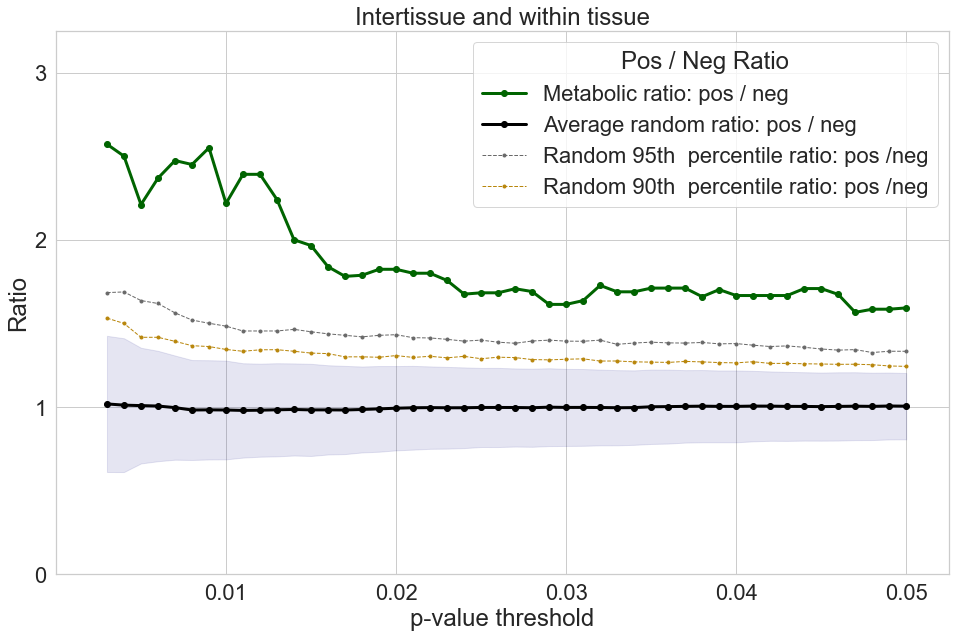

In [44]:
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))

plt.ylim(0, 3.25)
plt.yticks([0,1,2,3])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_ratio = df_p['ratio'].tolist()
avg_ratio = df_all['ratios'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratio low std'].tolist()
upper_bound_ratio = df_all['ratio high std'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
percentile90 = ratio_quantile90['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 




plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=3, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile90, linewidth=1, markersize=3, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg",
            "Random 95th  percentile ratio: pos /neg",
            "Random 90th  percentile ratio: pos /neg",
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Pos / Neg Ratio")
            
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p-value threshold')
plt.ylabel('Ratio')
plt.title('Intertissue and within tissue')
plt.savefig('4CPlus.png.png',dpi=600)

In [45]:
'''
sns.set(font_scale = 2,style="whitegrid")

ax = plt.figure(figsize=(16, 10))

plt.ylim(0, 3.25)
plt.yticks([0,1,2,3])
plt.xticks([ 0.01,0.02,0.03,
            0.04, 0.05])
plt.xlim(0,0.0525)

x = df_all_corr_averages.index.tolist()
met_ratio = df_p['ratio'].tolist()
avg_ratio = df_all['ratios'].tolist()

mean_ran_pos = df_all['pos cases'].tolist()
mean_ran_neg= df_all['neg cases'].tolist()

lower_bound_ratio = df_all['ratio low std'].tolist()
upper_bound_ratio = df_all['ratio high std'].tolist()

#lower_bound_neg = df_all['neg lower'].tolist()
#upper_bound_neg = df_all['neg higher'].tolist()

percentile95 = ratio_quantile95['ratios'].tolist()
#percentile05 = quantile05['neg cases'].tolist()
 
plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='black')
plt.plot(x, percentile95, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='dimgrey')
plt.plot(x, percentile99, linewidth=1, markersize=2, linestyle='dashed',
            marker = 'o',color='darkgoldenrod')



plt.plot(x, met_ratio, linewidth=3, markersize=6, marker = 'o',color='darkgreen')
plt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = 'o',color='navy')
plt.plot(x, percentile95, linewidth=3, markersize=6, linestyle='dashed',
            marker = 'o',color='mediumturquoise')

plt.fill_between(x, lower_bound_ratio, upper_bound_ratio, alpha=.1, color='navy')

#plt.plot(x, percentile05, linewidth=3, markersize=6, linestyle='dashed',
#         marker = 'o',color='coral')


#plt.fill_between(x, lower_bound_pos, upper_bound_pos, alpha=.1, color='limegreen')

#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')

#plt.plot(x, mean_ran_pos , linewidth=3, markersize=6, marker = 'o',color='limegreen')
#plt.plot(x, mean_ran_neg , linewidth=3, markersize=6, marker = 'o',color='red')

#plt.fill_between(x, lower_bound_neg, upper_bound_neg, alpha=.1, color='tomato')


#plt.plot(x, smooth, linewidth=3, markersize=6, marker = 'o',color='limegreen')



plt.legend(["Metabolic ratio: pos / neg", 
            "Average random ratio: pos / neg",
            "Random 95th  percentile ratio: pos /neg",
            #"Random 5th percentile: negative",
            
            #"Random: positive",
            #"Random: negative"
            ], 
            loc ="upper right",title="Ratio")
          
#upper_bound = [average_random+ std_random for average_random, std_random in zip(M_new_vec, Sigma_new_vec)]
#upper_bound = [M_new + Sigma for M_new, Sigma in zip(M_new_vec, Sigma_new_vec)]
#plt.savefig('figureBminimilistic.png')

plt.xlabel('p-value threshold')
plt.ylabel('Ratio')
plt.title('Intertissue and within tissue')
plt.savefig('interplus p ratio no legend',dpi=600)
'''

'\nsns.set(font_scale = 2,style="whitegrid")\n\nax = plt.figure(figsize=(16, 10))\n\nplt.ylim(0, 3.25)\nplt.yticks([0,1,2,3])\nplt.xticks([ 0.01,0.02,0.03,\n            0.04, 0.05])\nplt.xlim(0,0.0525)\n\nx = df_all_corr_averages.index.tolist()\nmet_ratio = df_p[\'ratio\'].tolist()\navg_ratio = df_all[\'ratios\'].tolist()\n\nmean_ran_pos = df_all[\'pos cases\'].tolist()\nmean_ran_neg= df_all[\'neg cases\'].tolist()\n\nlower_bound_ratio = df_all[\'ratio low std\'].tolist()\nupper_bound_ratio = df_all[\'ratio high std\'].tolist()\n\n#lower_bound_neg = df_all[\'neg lower\'].tolist()\n#upper_bound_neg = df_all[\'neg higher\'].tolist()\n\npercentile95 = ratio_quantile95[\'ratios\'].tolist()\n#percentile05 = quantile05[\'neg cases\'].tolist()\n \nplt.plot(x, met_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'darkgreen\')\nplt.plot(x, avg_ratio, linewidth=3, markersize=6, marker = \'o\',color=\'black\')\nplt.plot(x, percentile95, linewidth=1, markersize=2, linestyle=\'dashed\',\n   